In [1]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
from astropy import units as u
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
f = fits.open('ancillary_data/hetdex_vertices.fits')
ravals = []
decvals = []
for i in range(0,len(f[1].data['HETDEX_RA'][0])):
    ravals.append(f[1].data['HETDEX_RA'][0][i])
    decvals.append(f[1].data['HETDEX_DEC'][0][i])
ravals = np.array(ravals)
decvals = np.array(decvals)

In [44]:
def plotEverything(proj='nplaea',plot_2mrs=False,plot_lv=False,calibs=True,areas=True):
    if proj=='moll': m = Basemap(projection='moll',lon_0=90,resolution='l',celestial=True)
    else: m = Basemap(projection='nplaea',boundinglat=20,lon_0=310,resolution='l',celestial=True)
    m.drawparallels(np.arange(30,90,15),labels=[False,False,False,False],color='darkgray',fontsize=14)
    m.drawmeridians(np.arange(0,360,15),labels=[True,True,True,True],color='darkgray',latmax=90,fontsize=14)
    xpt,ypt=m(gal_coords.ra.deg,gal_coords.dec.deg)
#     xpt,ypt=m([0],[-10])
    if plot_2mrs:
        if not proj=='moll': m.plot(xpt,ypt,'o',markersize=3,alpha=0.2,label='',mfc='none',color='blue')
        m.plot(xpt[-1],ypt[-1],'o',markersize=3,alpha=0.8,label='2MRS: 1-12000kms',mfc='none',color='blue')
    if plot_lv:
        xpt,ypt=m(lv_coords.ra.deg,lv_coords.dec.deg)
        m.plot(xpt,ypt,'o',markersize=5,alpha=0.5,label='Local Volume: D<10 Mpc',mfc='darkorange',color='none') #Karachentsev
    if calibs:
        for c in calibrators:
            xpt,ypt=m(c.ra.deg,c.dec.deg)
            m.plot(xpt,ypt,'o',markersize=7,label='',mfc='green',color='black')

    #Draw APERTIF preferred declination limit (+27d):
    a,b=np.array(range(0,360,3)),np.array(range(0,360,3))*0+27
    m.plot(a,b,'--r',latlon=True,linewidth=1.2, label='+27$^d$')

    if areas:
    #     #Draw SDSS:
    #     a=np.array(range(7*15,17*15+1,5))+0.5*15
    #     b=np.array(range(7*15,17*15+1,5))*0+60
    #     m.plot(a,b,'-y',latlon=True,linewidth=1.2)
    #     b=np.array(range(7*15,17*15+1,5))*0
    #     m.plot([17.5*15,17.5*15],[0,60],'-y',latlon=True,linewidth=1.2)

    # #    #Draw HETDEX:
    #     m.plot(ravals,decvals,'-g',latlon=True,linewidth=1.2)
    #     a=[220,225,230,235,240,245,245,240,235,230,226.5]
    #     b=[54,54,54,54,54,54,47,47,47,47,47]
    #     m.plot(a,b,'-g',latlon=True,linewidth=1.2)

        #Draw LOFAR region:
        a,b=np.array(range(11*15,16*15+3,3)),np.array(range(11*15,16*15+3,3))*0+45    
        c,d=np.array(range(11*15,16*15+3,3)),np.array(range(11*15,16*15+3,3))*0+62
        m.plot(a,b,'-g',latlon=True,linewidth=1.2)
        m.plot([a[-1],c[-1]],[b[-1],d[-1]],'-g',latlon=True,linewidth=1.2)
        m.plot(c,d,'-g',latlon=True,linewidth=1.2)
        m.plot([a[0],c[0]],[b[0],d[0]],'-g',latlon=True,linewidth=1.2)

        #Draw Herschel-Atlas
        a=[191.298,190.515,208.505,207.683,191.298]
        b=[23.734,33.711,33.704,23.730,23.734]
        m.plot(a,b,'-r',latlon=True,linewidth=1.2)

        #Draw Perseus-Pisces
        a=[23.7,33.3,33.3,23.7,23.7]
        b=[29.9,29.9,37.9,37.9,29.9]
        m.plot(a,b,'-r',latlon=True,linewidth=1.2)

    #     #Draw Kovac CVn
    #     a=[184.98,191.76,191.76,184.19,184.98]
    #     b=[31.55, 31.55, 46.30, 46.30, 31.55]
    #     m.plot(a,b,'-b',latlon=True,linewidth=1.2)

    return m

In [4]:
flux_names = ['3C147', '3C196', 'Cyg A', 'Cas A', '3C48']
pol_names = ['3C138', '3C286']#, 'CTD93', '3C48']
all_cal_names = flux_names + pol_names
calibrators = [SkyCoord.from_name(name) for name in all_cal_names]

In [5]:
lofar_names = ['Elias-N','GOODS-N','Bootes?','Lockman']
lofar_ra = [242.75,189.2291666667,218.0,161.75]
lofar_dec = [55.0,62.2375,34.5,58.0833333333]
lofar_coord = SkyCoord(ra=lofar_ra, dec=lofar_dec, unit='deg')

In [15]:
# tbl = Table.read("../../2mrs/2mrs_v240.st",format='ascii')

# v_min=1   #units of 1000
# v_max=12
# galra=[]
# galdec=[]
# for r in range(len(tbl)):
#     if tbl[r]['decd'] >= 20. and tbl[r]['st'] >= v_min and tbl[r]['st'] < v_max:
#         galra.append(str(tbl[r]['rah'])+'h'+str(tbl[r]['ram'])+'m'+str(tbl[0]['ras'])+'s')
#         #galra[r]=ra[r].wrap_at(180*u.degree)
#         galdec.append(str(tbl[r]['decd'])+'d'+str(tbl[r]['decm'])+'m'+str(tbl[0]['decs'])+'s')
                 
# gal_coords = SkyCoord(ra=galra,dec=galdec,unit='deg')

In [7]:
# kara=Table.read('../../2mrs/karachentsev_localvol_table1.dat.txt',format='ascii.fixed_width')
# lvra=[]
# lvdec=[]
# for i in range(len(kara)):
#     if int(kara['J2000.0'][i][8:11]) >= 0:
#         lvra.append(str(kara['J2000.0'][i][0:2]+'h'+kara['J2000.0'][i][2:4]+'m'+kara['J2000.0'][i][4:8]+'s'))
#         lvdec.append(str(kara['J2000.0'][i][8:11]+'d'+kara['J2000.0'][i][11:13]+'m'+kara['J2000.0'][i][13:17]+'s'))
# lv_coords = SkyCoord(ra=lvra,dec=lvdec,unit='deg')

In [8]:
# wings=Table.read('../../2mrs/wings_clusters.txt',format='ascii')
# temp_coord = []
# for i in range(len(wings)):
#     temp_coord.append("{} {}".format(wings[i]['RA'],wings[i]['Dec']))
# temp_coord=np.array(temp_coord)
# wings_coords = SkyCoord(temp_coord,unit=[u.hourangle,u.deg])

In [9]:
sched=Table.read('ancillary_data/all_sched.csv')
sched_coord=SkyCoord(ra=sched['ra'],dec=sched['dec'],unit=[u.hour,u.deg])

In [41]:
# survey=Table.read('ancillary_data/all_pointings.v7.18jun20.txt',format='ascii.fixed_width')
survey=Table.read('ancillary_data/apertif_v12.21jan21.txt',format='ascii.fixed_width')

In [42]:
survey_coord=SkyCoord(survey['hmsdms'][(survey['label'] == 's') | (survey['label'] == 'm') | (survey['label'] == 'l')])
mds_coord=SkyCoord(survey['hmsdms'][(survey['label'] == 'm')])
wide2_coord=SkyCoord(survey['hmsdms'][(survey['label'] == 'l')])

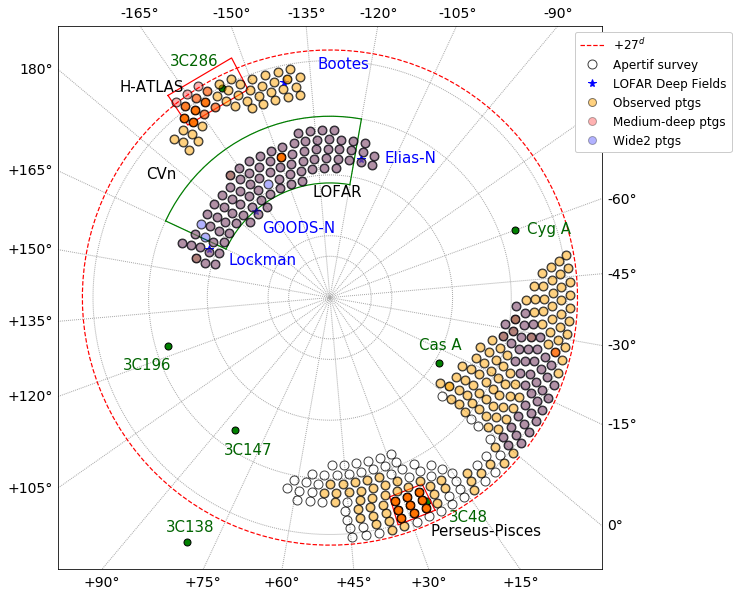

In [45]:
plt.figure(figsize=[10,10])
m=plotEverything(plot_2mrs=False)

xpt,ypt=m(survey_coord.ra.deg,survey_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=9,alpha=0.75,label='Apertif survey',mfc='none', markeredgecolor='black')

xpt,ypt=m(lofar_coord.ra.deg,lofar_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=1.0,label='LOFAR Deep Fields',color='blue', marker='*')

xpt,ypt=m(sched_coord.ra.deg,sched_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed ptgs',mfc='orange', markeredgecolor='black')
# m.plot(-100,-100,'o',markersize=8,alpha=0.5,label='Observed pointings',mfc='orange', markeredgecolor='black')

### Highlight MDS in red if you want:
xpt,ypt=m(mds_coord.ra.deg,mds_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.3,label='Medium-deep ptgs',mfc='red', markeredgecolor='black')

### Highlight Wide-2 if you want:
xpt,ypt=m(wide2_coord.ra.deg,wide2_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.3,label='Wide2 ptgs',mfc='blue', markeredgecolor='black')

plt.legend(loc=1, fontsize='large', framealpha=1.0, bbox_to_anchor=(1.25, 1.00))
textlabel=['H-ATLAS','CVn','LOFAR','Perseus-Pisces']
xlab,ylab=m([184.5,173,220,27],[13,35,65,24])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15)
textlabel=['3C147','3C138','3C196','3C286','Cyg A', 'Cas A', '3C48']
xlab,ylab=m([84,85,121,195.5,302,350,22,],[43,16,35,17,38,65,25.5])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='darkgreen')
textlabel = ['Elias-N','GOODS-N','Bootes','Lockman']
xlab,ylab = m([252,184,227,158,],[54,67,32,64])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='blue')
# plt.savefig('./observed.2feb20.png',dpi=150,bbox_inches='tight')

In [264]:
final=Table.read('imaging_201215_cyga_22h_final.csv',data_start=0,names=['name','ra','ha','dec','date1','time1','date2','time2','interval','type','beam','dunno','dunno2','bw','ctrfreq','file'])
final_coord=SkyCoord(ra=final['ra'],dec=final['dec'],unit=[u.hour,u.deg])
final[0:1]#,final_coord[0:1]

name,ra,ha,dec,date1,time1,date2,time2,interval,type,beam,dunno,dunno2,bw,ctrfreq,file
str10,str8,int64,str9,str10,str8,str10,str8,int64,str1,str8,int64,float64,int64,int64,str88
S1137+4606,11:37:45,--,+46:06:18,2021-02-03,20:27:53,2021-02-04,07:57:53,30,T,compound,0,-1.0,300,1280,/opt/apertif/share/parsets/parset_start_observation_atdb_SubbandPhaseCorrection.template


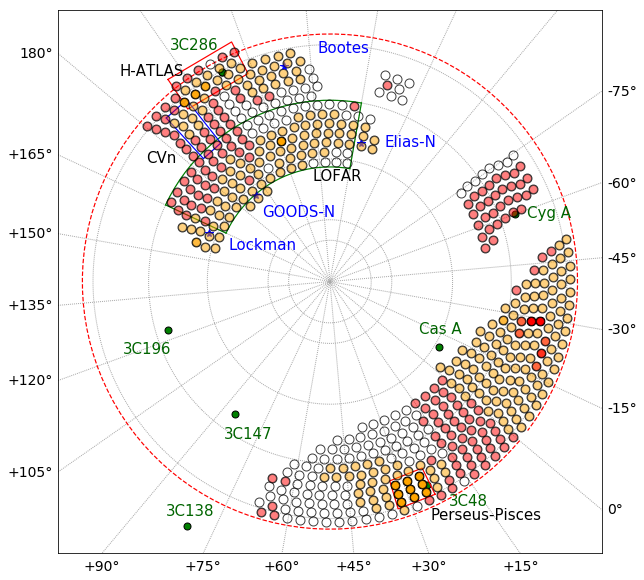

In [265]:
plt.figure(figsize=[10,10])
m=plotEverything()
xpt,ypt=m(sched_coord_av.ra.deg,sched_coord_av.dec.deg)
m.plot(xpt,ypt,'o',markersize=9,alpha=0.75,label='Apertif survey',mfc='none', markeredgecolor='black')

# xpt,ypt=m(survey_coord.ra.deg,survey_coord.dec.deg)
# m.plot(xpt,ypt,'o',markersize=9,alpha=0.75,label='Apertif survey',mfc='none', markeredgecolor='black')

xpt,ypt=m(lofar_coord.ra.deg,lofar_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=1.0,label='LOFAR Deep Fields',color='blue', marker='*')

xpt,ypt=m(sched_coord.ra.deg,sched_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed ptgs',mfc='orange', markeredgecolor='black')
# m.plot(-100,-100,'o',markersize=8,alpha=0.5,label='Observed pointings',mfc='orange', markeredgecolor='black')

xpt,ypt=m(final_coord.ra.deg,final_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed ptgs',mfc='red', markeredgecolor='black')

# other possibilities:
# xpt,ypt=m(perseus.ra.deg,perseus.dec.deg)
# m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed ptgs',mfc='k', markeredgecolor='black')
# xpt,ypt=m(wings_coords.ra.deg,wings_coords.dec.deg)
# m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed ptgs',mfc='k', markeredgecolor='black')

### Highlight MDS in red if you want:
# xpt,ypt=m(mds_coord.ra.deg,mds_coord.dec.deg)
# m.plot(xpt,ypt,'o',markersize=8,alpha=0.3,label='Medium-deep ptgs',mfc='red', markeredgecolor='black')
# m.plot(-100,-100,'o',markersize=8,alpha=0.3,mfc='red', markeredgecolor='black') #medium deep

# plt.legend(loc=1, fontsize='large')
# plt.legend(loc=1, fontsize='large', framealpha=1.0, bbox_to_anchor=(1.25, 1.00))
# textlabel=['H-ATLAS','CVn','HETDEX','Perseus-Pisces']
# xlab,ylab=m([184.5,173,220,27],[13,35,63,24])
textlabel=['H-ATLAS','CVn','LOFAR','Perseus-Pisces']
xlab,ylab=m([184.5,173,220,27],[13,35,65,24])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15)
textlabel=['3C147','3C138','3C196','3C286','Cyg A', 'Cas A', '3C48']
xlab,ylab=m([84,85,121,195.5,302,350,22,],[43,16,35,17,38,65,25.5])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='darkgreen')
textlabel = ['Elias-N','GOODS-N','Bootes','Lockman']
xlab,ylab = m([252,184,227,158,],[54,67,32,64])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='blue')
plt.savefig('./observed_cyga_22h_final.2feb20.png',dpi=150,bbox_inches='tight')